# National Health and Nutrition Examination Survey (NHANES) Exploratory Data Analysis
Documentation about dataset: https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm

The demographics file provides individual, family, and household-level information on the following topics:
 * Survey participant’s household interview and examination status;
 * Interview and examination sample weights;
 * Masked variance units;
 * Language of questionnaires used for the interviews conducted in the household and in the mobile examination center;
 * Use of proxy or interpreter during the interviews;
 * The six-month time period when the examination was performed;
 * Pregnancy status;
 * Household and family income;
 * Household and family sizes;
 * Household composition: the number of children (aged 5 years or younger and 6-17 years old), and adults aged 60 years or older, in the household;
 * Demographic information about the household reference person; and       
 * Other selected demographic information, such as gender, age, race/Hispanic origin, education, marital status, military service status, country of birth, citizenship, and years of U.S. residence.

In [1]:
import xport

import numpy as np
import scipy as scp

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
%matplotlib inline

# 1. Load NHANES data

In [2]:
with open("../data/DEMO_I.XPT", 'rb') as f:
    df = xport.to_dataframe(f)

print(df.shape)
df.head()

(9971, 47)


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,83732.0,9.0,2.0,1.0,62.0,NaN,3.0,3.0,1.0,NaN,...,5.0,1.0,3.0,134671.370419,135629.507405,1.0,125.0,10.0,10.0,4.39
1,83733.0,9.0,2.0,1.0,53.0,NaN,3.0,3.0,1.0,NaN,...,3.0,3.0,NaN,24328.560239,25282.425927,1.0,125.0,4.0,4.0,1.32
2,83734.0,9.0,2.0,1.0,78.0,NaN,3.0,3.0,2.0,NaN,...,3.0,1.0,3.0,12400.008522,12575.838818,1.0,131.0,5.0,5.0,1.51
3,83735.0,9.0,2.0,2.0,56.0,NaN,3.0,3.0,2.0,NaN,...,5.0,6.0,NaN,102717.995647,102078.634508,1.0,131.0,10.0,10.0,5.00
4,83736.0,9.0,2.0,2.0,42.0,NaN,4.0,4.0,2.0,NaN,...,4.0,3.0,NaN,17627.674984,18234.736219,2.0,126.0,7.0,7.0,1.23


# 2. Causal Questions
## 2.1 What is the link between education and income level?

/Users/ayushkarnawat/miniconda3/envs/eecs442/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/ayushkarnawat/miniconda3/envs/eecs442/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


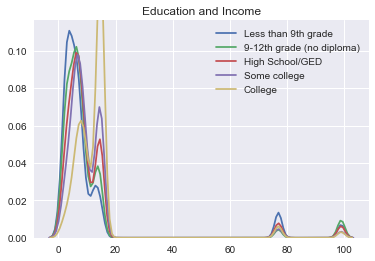

In [3]:
ax = sns.kdeplot(df[df.DMDEDUC2 == 1.0].INDHHIN2, shade=False)
ax = sns.kdeplot(df[df.DMDEDUC2 == 2.0].INDHHIN2, shade=False)
ax = sns.kdeplot(df[df.DMDEDUC2 == 3.0].INDHHIN2, shade=False)
ax = sns.kdeplot(df[df.DMDEDUC2 == 4.0].INDHHIN2, shade=False)
ax = sns.kdeplot(df[df.DMDEDUC2 == 5.0].INDHHIN2, shade=False)
ax.set_title('Education and Income')
ax.legend(['Less than 9th grade', '9-12th grade (no diploma)', 
           'High School/GED', 'Some college', 'College'], loc='best')

We can see that the distribution is sort of shifted for graduates with a college educaction (i.e. they earn more money on average than non-college graduates)

## 2.2. What is the link between education level and teenage pregnancy? Potential causes?
Apparently there is no data about pregnancies for teenage females (i.e. between the ages 13-18) in this dataset (will have to look into the adolencest one). It only contains data for females between 20-44 years.

[ 1.  2.  3.] [ 37 633  50]


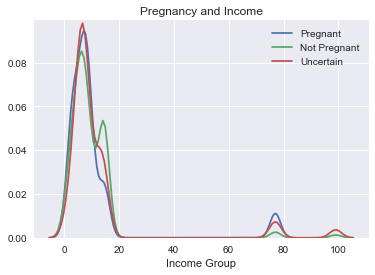

In [4]:
# Assuming the label here female's pregnancy status
female = df.loc[(df.DMDHRGND == 2.0)] # Extract all females
female_dropna = female[['RIDAGEYR', 'RIDEXPRG', 'INDHHIN2']].dropna()

# Determine number of datapoints for each type of pregnancy status
labels, counts = np.unique(female_dropna['RIDEXPRG'], return_counts=True)
print(labels, counts)

pregnant = female_dropna.loc[female_dropna.RIDEXPRG == 1.0]
not_pregnant = female_dropna.loc[female_dropna.RIDEXPRG == 2.0]
uncertain = female_dropna.loc[female_dropna.RIDEXPRG == 3.0]

ax = sns.kdeplot(pregnant.INDHHIN2, shade=False)
ax = sns.kdeplot(not_pregnant.INDHHIN2, shade=False)
ax = sns.kdeplot(uncertain.INDHHIN2, shade=False)
ax.set_title('Pregnancy and Income')
ax.set_xlabel('Income Group')
ax.legend(['Pregnant', 'Not Pregnant', 'Uncertain'], loc='best')

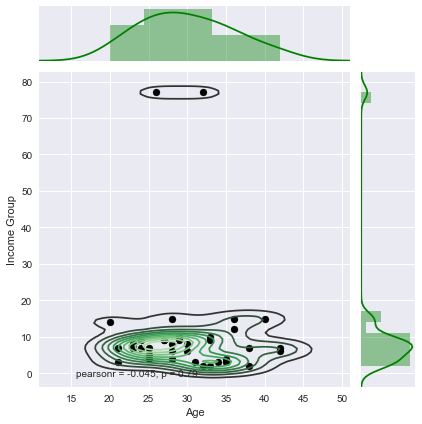

In [5]:
g = sns.JointGrid(x="RIDAGEYR", y="INDHHIN2", data=pregnant, size=6, ratio=5)
g.plot_joint(sns.kdeplot, cmap="Greens_d", shade=False, shade_lowest=False)
g.plot_joint(plt.scatter, c='black')
g.plot_marginals(sns.distplot, kde=True, color="green")

# # Plot the 'not pregnant' distribution as well
# g.x = not_pregnant.RIDAGEYR
# g.y = not_pregnant.INDHHIN2
# g.plot_joint(sns.kdeplot, cmap="Blues_d", shade=False, shade_lowest=False)
# g.plot_marginals(sns.distplot, kde=True, color="blue")

g.set_axis_labels(xlabel='Age', ylabel='Income Group')
g.annotate(scp.stats.pearsonr, loc='best')